# Importación de librerías y recursos

In [1]:
from polynomial_preprocessing.extrapolation_process import procesamiento_datos_continuos, procesamiento_datos_grillados
from polynomial_preprocessing.preprocessing import preprocesamiento_datos_a_grillar
from polynomial_preprocessing.optimization import optimizacion_parametros_continuos, optimizacion_parametros_grillados
from polynomial_preprocessing.image_reconstruction import conjugate_gradient
import numpy as np
from scipy.interpolate import griddata
from astropy.io import fits
from matplotlib import pyplot as plt
import astropy.units as unit

# Ejemplo con datos continuos:
Ejemplo con los parámetros utilizados por Hugo:

In [ ]:
ejemplo_dc = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
	fits_path = "/disk2/stephan/datasets/HD142/hd142_p251_cell_0.03.fits", #Path del archivo FITS
    ms_path = "/disk2/stephan/datasets/HD142/hd142_b9cont_self_tav.ms", #Path del archivo MS
	num_polynomial = 20, #Numero de grado de polinomio maximo
    division_sigma =  10**(-1), # Division de sigma
    pixel_size= 0.0007310213536, #Tamaño de Pixel
    n_iter_gc = 10, # Numero de iteraciones del GC
    verbose = False, # Flag para indicar si guardar archivos (fits de salida, visib, pesos, etc) en el disco duro.
    plots = True, # Flag para indicar si se mostrarán gráficos de salida durante el procesamiento.
    gpu_id = 1 # ID de GPU para trabajar (en beam: de 0 a 3)
)

ejemplo_dc.data_processing()

# Ejemplo con datos para grillar:
Ejemplo con dataset grande para grillar.

In [ ]:
ejemplo_dg = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	fits_path = "/disk2/stephan/datasets/DSHARP/GWLup/GWLup_p251_cell_0.015.fits", # Path del archivo FITS
    ms_path = "/disk2/stephan/datasets/DSHARP/GWLup/GWLup_continuum.ms", # Path del archivo MS
	num_polynomial = 30, # Numero de grado de polinomios
    division_sigma =  0.00000750780409680797, # División sigma
    pixel_size = (-7.272205216643621e-08 * 0.21) * unit.rad,
    n_iter_gc= 10, # Numero de iteraciones para GC
    verbose = False, # Flag para indicar si guardar archivos (fits de salida, visib, pesos, etc) en el disco duro.
    plots = True, # Flag para indicar si se mostrarán gráficos de salida durante el procesamiento.
    gpu_id=2 # ID de GPU para trabajar (en beam: de 0 a 3)
)

ejemplo_dg.data_processing()

In [ ]:
ejemplo_dg = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	fits_path="/disk2/stephan/datasets/HD142/v3_final/HD142_p213_cell_0.075.fits", # Path del FITS
    ms_path="/disk2/stephan/datasets/HD142/v3_final/hd142_b9cont_self_tav.ms", # Path del MS
	num_polynomial = 100, # Numero de grado de polinomios
    division_sigma =  0.00001, # División sigma
    b = 1,
    n_iter_gc= 10, # Numero de iteraciones para GC
    verbose = False, # Flag para indicar si guardar archivos (fits de salida, visib, pesos, etc) en el disco duro.
    plots = True, # Flag para indicar si se mostrarán gráficos de salida durante el procesamiento.
    gpu_id=3 # ID de GPU para trabajar (en beam: de 0 a 3)
)

ejemplo_dg.data_processing()

# Optimización de parámetros para datos grillados

In [ ]:
optim_param_dg = optimizacion_parametros_grillados.OptimizacionParametrosGrillados(
	fits_path="/disk2/stephan/datasets/HD142/v3_final/HD 142527_modified_v3.fits", # Path del FITS
    ms_path="/disk2/stephan/datasets/HD142/v3_final/hd142_continuum_model.ms", # Path del MS
	poly_limits=[19, 35], # Valores entre los que se probarán los valores de polinomios
    division_limits=[10**(-20), 20], # Valores entre los que se probarán de division sigma
    n_iter_gc=10, # Num. de iteraciones para la reconstruccion de cada imagen con GC
    verbose=False,
    plots=True, # Flag para mostrar (o no) los graficos de la imagen modelo vs la imagen generada en cada intento (post GC)
    gpu_id=1 # ID de la GPU con la que se va a trabajar (beam: de 0 a 3)
)

optim_param_dg.initialize_optimization(5) # El parametro aqui es para definir el numero de intentos que se harán para realizar la optimización.

In [ ]:
ejemplo_dg = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	fits_path = "/disk2/stephan/fits_umbralizados/HD_163296_modified.fits", # Path del archivo FITS
    ms_path = "/disk2/stephan/datasets/DSHARP/Sz114/Sz114_continuum_model.ms", # Path del archivo MS
	num_polynomial = 80, # Numero de grado de polinomios
    division_sigma =  0.00000750780409680797, # División sigma
    n_iter_gc= 10, # Numero de iteraciones para GC
    verbose = False, # Flag para indicar si guardar archivos (fits de salida, visib, pesos, etc) en el disco duro.
    plots = True, # Flag para indicar si se mostrarán gráficos de salida durante el procesamiento.
    gpu_id=2 # ID de GPU para trabajar (en beam: de 0 a 3)
)


'''
fits_path = "/disk2/stephan/datasets/DSHARP/Sz114/Sz114_p251_cell_0.007.fits", # Path del archivo FITS
ms_path = "/disk2/stephan/datasets/DSHARP/Sz114/Sz114_continuum.ms", # Path del archivo MS
'''


ejemplo_dg.graficar_visibilidades_sinteticos()

In [ ]:
ejemplo_dg = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	fits_path="/disk2/stephan/datasets/HD142/v3_final/HD142_p213_cell_0.075.fits",
    ms_path="/disk2/stephan/datasets/DSHARP/HD163296/V2/HD163296_continuum.ms", # Path del archivo MS
	num_polynomial = 80, # Numero de grado de polinomios
    division_sigma =  0.00000750780409680797, # División sigma
    n_iter_gc= 10, # Numero de iteraciones para GC
    verbose = False, # Flag para indicar si guardar archivos (fits de salida, visib, pesos, etc) en el disco duro.
    plots = True, # Flag para indicar si se mostrarán gráficos de salida durante el procesamiento.
    gpu_id=2 # ID de GPU para trabajar (en beam: de 0 a 3)
)

datos_fits = ejemplo_dg.reemplazar_nan_fits()

Pixel size of FITS on degree:  -1.111111111111e-06
Pixel size of FITS on radians:  -1.9392547244379502e-08 rad
Image size of FITS:  313
El objeto en el archivo FITS es: V866 Sco


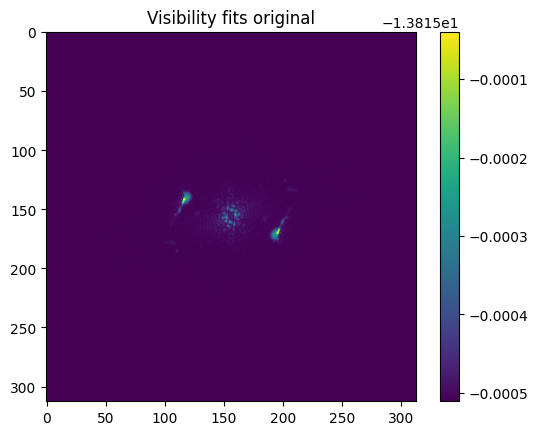

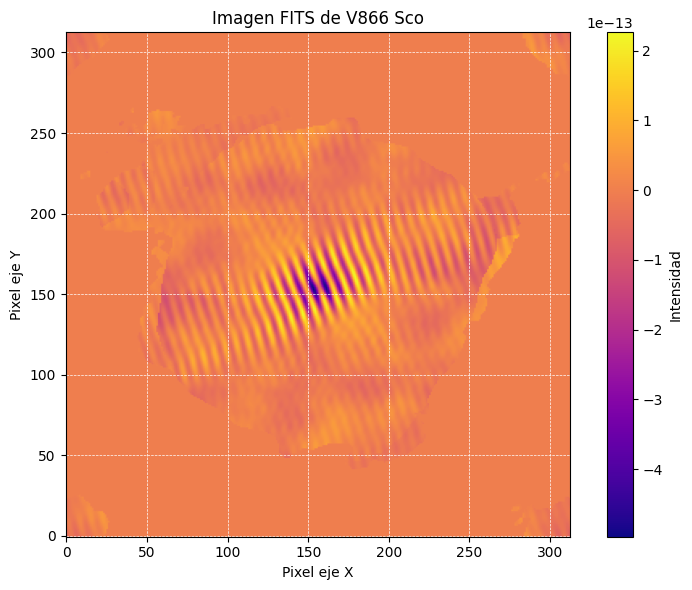

In [55]:
ejemplo_dg = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	fits_path = "/disk2/stephan/imagenes_residuo/imagen_residuo_V866 Sco.fits", # Path del FITS
    ms_path = "/disk2/stephan/datasets/DSHARP/HD163296/V2/HD163296_continuum.ms",
	num_polynomial = 80, # Numero de grado de polinomios
    division_sigma =  0.00000750780409680797, # División sigma
    n_iter_gc= 10, # Numero de iteraciones para GC
    verbose = False, # Flag para indicar si guardar archivos (fits de salida, visib, pesos, etc) en el disco duro.
    plots = True, # Flag para indicar si se mostrarán gráficos de salida durante el procesamiento.
    gpu_id=2 # ID de GPU para trabajar (en beam: de 0 a 3)
)

datos_fits = ejemplo_dg.graficar_visibilidades_sinteticos_grid_extra()

In [34]:
ejemplo_dg = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	fits_path="/disk2/stephan/output_oficiales_kernel_5/HD163296/gridded_reconstructed_image_num_polynomial_42_division_sigma_15.835000760603402_pixel_size_-3.733065344543621e-08 rad_image_size_371_371_HD_163296.fits,
    ms_path="/disk2/stephan/datasets/DSHARP/HD163296/V2/HD163296_continuum.ms", # Path del archivo MS
	num_polynomial = 80, # Numero de grado de polinomios
    division_sigma =  0.00000750780409680797, # División sigma
    n_iter_gc= 10, # Numero de iteraciones para GC
    verbose = False, # Flag para indicar si guardar archivos (fits de salida, visib, pesos, etc) en el disco duro.
    plots = True, # Flag para indicar si se mostrarán gráficos de salida durante el procesamiento.
    gpu_id=2 # ID de GPU para trabajar (en beam: de 0 a 3)
)

datos_fits = ejemplo_dg.umbralizar_fits(0.00115)

SyntaxError: unterminated string literal (detected at line 2) (2837013490.py, line 2)

Pixel size of FITS on degree:  -1.111111111111e-06
Pixel size of FITS on radians:  -1.9392547244379502e-08 rad
Image size of FITS:  313
Resolución teórica:  8.080212858592424e-08 rad
Tamaño de pixel en radianes:  -1.9392547244379502e-08 rad
dx a entregar:  -1.9392547244379502e-08 rad
El tiempo de ejecución del gridding de conv. fue de:  237.48767566680908


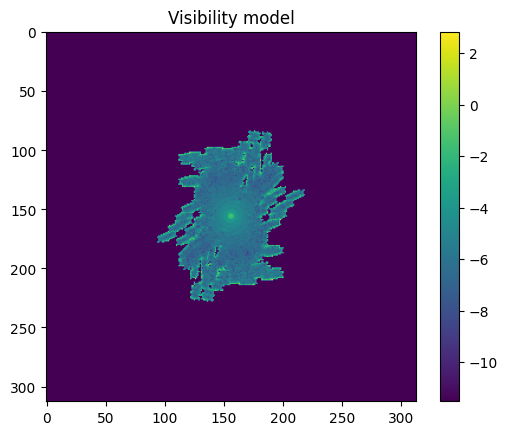

El objeto en el archivo FITS es: V866 Sco


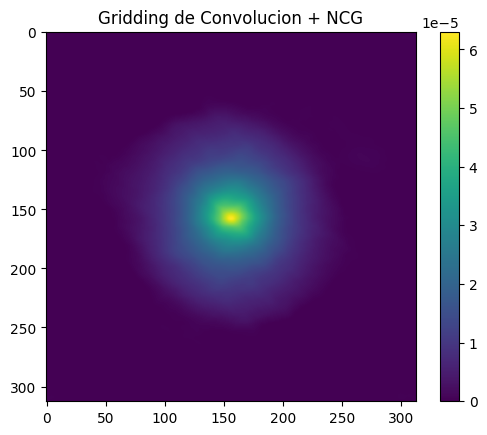

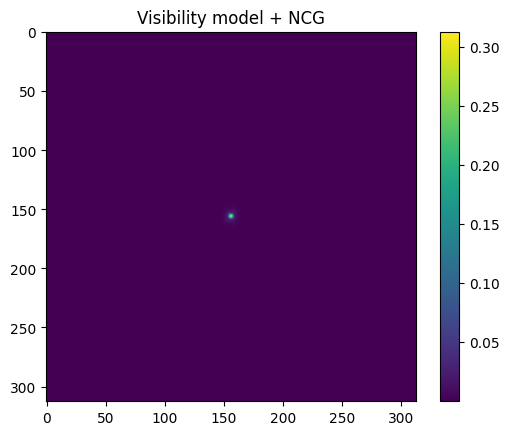

Tiempo de ejecución (Gridding de Conv.): 242.27 segundos


In [11]:
ejemplo_dg_conv = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	fits_path = "/disk2/stephan/datasets/DSHARP/AS205/v2/AS205_p313_cell_0.004.fits", # Path del FITS
    ms_path = "/disk2/stephan/datasets/DSHARP/AS205/v2/AS205_continuum.ms", # Path del MS
	num_polynomial = 80, # Numero de grado de polinomios
    division_sigma =  0.00000750780409680797, # División sigma
    n_iter_gc= 10, # Numero de iteraciones para GC
    verbose = True, # Flag para indicar si guardar archivos (fits de salida, visib, pesos, etc) en el disco duro.
    plots = True, # Flag para indicar si se mostrarán gráficos de salida durante el procesamiento.
    gpu_id=0 # ID de GPU para trabajar (en beam: de 0 a 3)
)

imagen_grid, vis_grid = ejemplo_dg_conv.convolutional_gridding()

Pixel size of FITS on degree:  -1.111111111111e-06
Pixel size of FITS on radians:  -1.9392547244379502e-08 rad
Image size of FITS:  313
self.pixel_size:  -1.9392547244379502e-08 rad
self.image_size:  313
Resolución teórica:  8.080212858592424e-08 rad
Tamaño de pixel en radianes:  -1.9392547244379502e-08 rad


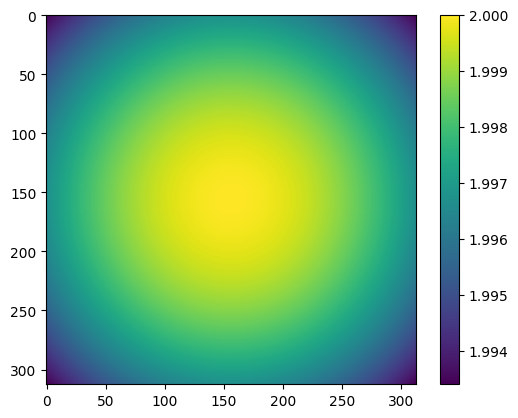

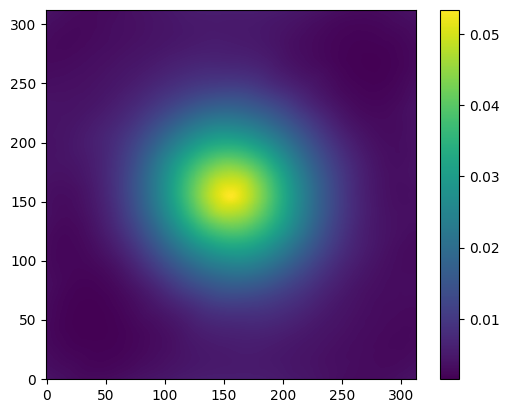

dx a entregar:  -1.9392547244379502e-08 rad
El tiempo de ejecución del gridding de conv. fue de:  247.8690767288208
El objeto en el archivo FITS es: V866 Sco
visibilidades:  [[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]
visibilidades.size:  97969
cantidad_no_ceros:  9595
Porcentaje de elementos distintos de cero: 9.7939%


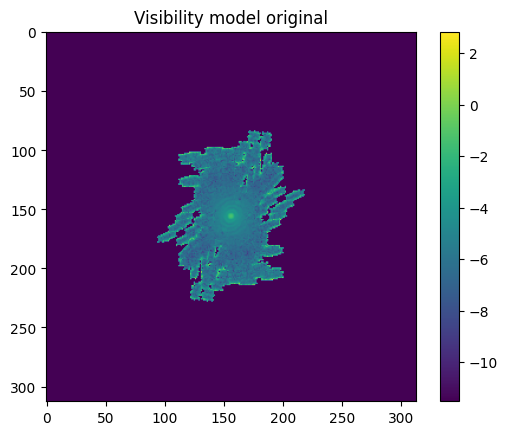

In [51]:
ejemplo_dg = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	fits_path = "/disk2/stephan/datasets/DSHARP/AS205/v2/AS205_p313_cell_0.004.fits", # Path del FITS
    ms_path = "/disk2/stephan/datasets/DSHARP/AS205/v2/AS205_continuum.ms", # Path del MS
	num_polynomial = 80, # Numero de grado de polinomios
    division_sigma =  0.00000750780409680797, # División sigma
    n_iter_gc= 10, # Numero de iteraciones para GC
    verbose = False, # Flag para indicar si guardar archivos (fits de salida, visib, pesos, etc) en el disco duro.
    plots = True, # Flag para indicar si se mostrarán gráficos de salida durante el procesamiento.
    gpu_id=2 # ID de GPU para trabajar (en beam: de 0 a 3)
)

datos_fits = ejemplo_dg.porcentaje_plano_lleno()

In [50]:
import numpy as np

def calcular_porcentaje_no_nulo(npz_path):
    # Cargar el archivo .npz
    data = np.load(npz_path, allow_pickle=True)
    arreglo = data['arr_0']  # Asumimos que la clave es 'arr_0'

    # Calcular número total de elementos y no nulos
    total = arreglo.size
    no_nulos = np.count_nonzero(arreglo)

    # Calcular porcentaje
    porcentaje = (no_nulos / total) * 100
    return porcentaje

# Ejemplo de uso
archivo = "/disk2/stephan/output_oficiales_kernel_5/AS205/gridded_visibility_model_natural_num_polynomial_54_division_sigma_9.318538961426533_pixel_size_-1.9392547244379502e-08 rad_image_size_313_313_V866 Sco.npz"
porcentaje = calcular_porcentaje_no_nulo(archivo)
print(f"Porcentaje de valores distintos de cero: {porcentaje:.2f}%")


Porcentaje de valores distintos de cero: 11.20%


In [ ]:
ejemplo_dc_hd142 = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
	fits_path = "/disk2/stephan/datasets/HD142/hd142_p251_cell_0.03.fits",
    ms_path = "/disk2/stephan/datasets/HD142/hd142_b9cont_self_tav.ms", 
	num_polynomial = 20, 
    division_sigma =  10**(-1),
    pixel_size= 0.0007310213536,
    n_iter_gc = 10,
    verbose = True,
    plots = True
)

ejemplo_dc_hd142.data_processing()

In [53]:
ejemplo_dg = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	fits_path = "/disk2/stephan/output_oficiales_kernel_5/AS205/gridded_reconstructed_image_num_polynomial_54_division_sigma_9.318538961426533_pixel_size_-1.9392547244379502e-08 rad_image_size_313_313_V866 Sco.fits", # Path del FITS
    ms_path = "/disk2/stephan/datasets/DSHARP/HD163296/V2/HD163296_continuum.ms", # Path del MS
	num_polynomial = 70, # Numero de grado de polinomios
    division_sigma =  0.00000750780409680797, # División sigma
    n_iter_gc= 10, # Numero de iteraciones para GC
    verbose = False, # Flag para indicar si guardar archivos (fits de salida, visib, pesos, etc) en el disco duro.
    plots = True, # Flag para indicar si se mostrarán gráficos de salida durante el procesamiento.
    gpu_id=2 # ID de GPU para trabajar (en beam: de 0 a 3)
)

datos_fits = ejemplo_dg.psnr(313, 115)

Pixel size of FITS on degree:  -1.111111111111e-06
Pixel size of FITS on radians:  -1.9392547244379502e-08 rad
Image size of FITS:  313
2.981222733434195e-15


Pixel size of FITS on degree:  -2.083333333333e-05
Pixel size of FITS on radians:  -3.636102608320938e-07 rad
Image size of FITS:  213
El objeto en el archivo FITS es: V866 Sco


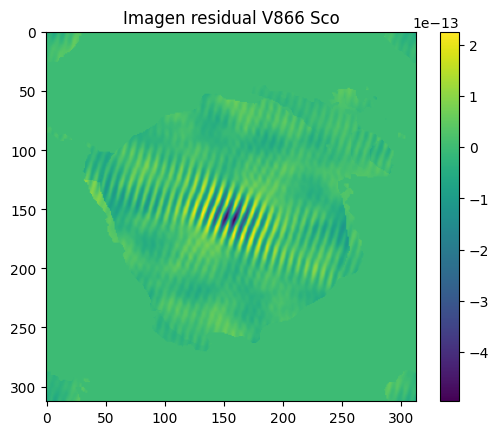

In [54]:
ejemplo_dg = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	fits_path = "/disk2/stephan/convolutional_gridding/convolutional_gridding_HD 142527.fits", # Path del FITS
    ms_path = "/disk2/stephan/datasets/HD142/v3_final/hd142_b9cont_self_tav.ms", # Path del MS
	num_polynomial = 70, # Numero de grado de polinomios
    division_sigma =  0.00000750780409680797, # División sigma
    n_iter_gc= 10, # Numero de iteraciones para GC
    verbose = False, # Flag para indicar si guardar archivos (fits de salida, visib, pesos, etc) en el disco duro.
    plots = True, # Flag para indicar si se mostrarán gráficos de salida durante el procesamiento.
    gpu_id=2 # ID de GPU para trabajar (en beam: de 0 a 3)
)

datos_fits = ejemplo_dg.generar_imagen_residuo("/disk2/stephan/convolutional_gridding_kernel_5/convolutional_gridding_kernel_5_V866 Sco.fits", "/disk2/stephan/output_oficiales_kernel_5/AS205/gridded_reconstructed_image_num_polynomial_54_division_sigma_9.318538961426533_pixel_size_-1.9392547244379502e-08 rad_image_size_313_313_V866 Sco.fits")

In [9]:

def contar_visibilidades_no_nulas(ruta_npz):
    """
    Cuenta cuántas visibilidades no nulas hay en el archivo .npz dado.
    
    Parámetros:
    ruta_npz (str): Ruta al archivo .npz que contiene un arreglo complejo 2D.
    
    Retorna:
    int: Número de entradas no nulas (≠ 0+0j) en el arreglo.
    """
    data = np.load(ruta_npz)
    visibilidades = data[data.files[0]]  # Se asume que el primer elemento es el arreglo principal
    return np.count_nonzero(visibilidades)

contar_visibilidades_no_nulas("/disk2/stephan/opti_kernel_5_grid/opti_hd142/gridded_visibility_model_natural_trial_num_15_num_polynomial_20_division_sigma_8.541259288821404_b_0.6632456037577206_pixel_size_-3.636102608320938e-07 rad_image_size_213_213_HD 142527.npz")

4775